# LIVE CODE 2

### Identitas
Nama : Ikhbar Firman Hanafi

Batch: 14

Phase: 0

### Problem 1

Salah satu ruang lingkup Natural Language Processing (NLP) adalah mengukur kesamaan konteks antar kalimat. Untuk mengetahui dua kalimat memiliki konteks yang sama atau tidak, kita mengukurnya dengan cosine similarity. Cosine similarity sejatinya mengukur 'jarak' antar dua vektor yang mana vektor-vektor tersebut berisikan angka-angka, sehingga kita perlu menerjemahkan kalimat menjadi list angka (encoding). Ada banyak metode encoding yang dapat digunakan untuk menerjemahkan kalimat ke angka, salah satunya adalah dengan menghitung frekuensi kemunculan kata pada setiap kalimat.

Kalimat 1: Julie loves me more than Linda loves me

Kalimat 2: Jane likes me more than Julie loves me

Kata	Kalimat 1	Kalimat 2

me	    2	2

Jane	0	1

Julie	1	1

Linda	1	0

likes	0	1

loves	2	1

more	1	1

than	1	1

Pertama-tama kita akan membentuk vektor dimana elemennya merupakan frekuensi dari tiap kata-kata tersebut pada kalimat 1 dan kalimat 2 sebagai berikut:

Karena data tersebut akan ktia oleh menjadi vektor, maka pertama kita akan import library **numpy**.

In [15]:
import numpy as np

Kita akan jadikan vektor dari frekuensi tiap kata pada kalimat 1 dan kalimat 2 dengan menggunakan *numpy.array*

In [16]:
kal_1 = np.array([2,0,1,1,0,2,1,1])
kal_2 = np.array([2,1,1,0,1,1,1,1])

Berikutnya kita akan coba menghitung nilai dari $cos(\theta)$ dari vektor kal_1 dan kal_2 dimana:

$cos(\theta)=\frac{kal_1.kal_2} {|kal_1||kal_2|}$

In [17]:
cos_theta = (kal_1 @ kal_2)/(np.linalg.norm(kal_1)*np.linalg.norm(kal_2)) #Menghitung nilai cos
print(f'Didapat nilai cos dari dua kalimat tersebut sebesar {round(cos_theta,2)}')

Didapat nilai cos dari dua kalimat tersebut sebesar 0.82


Dari perhitungan di atas di dapat cosine similarity antar kedua vektor tersebut adalah sekitar 0.82.

#### a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

Kedua kalimat tersebut bisa dikatakan **serupa** (berdasarkan frekuensi kemunculan kata), karena nilai dari cosine similarity yaitu 0.82 cukup mendekati 1. Dimana pada konsep cosine similarity apabila nilai $0\le cos{\theta}\le1$ pada $\theta$ kuadran 1, dimana kedua kalimat dikatakan serupa apabila nilai cos mendekati 1, dan sebaliknya kedua kalimat semakin tidak serupa apabila nilai cos mendekati 0.

#### b.  Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

Pada ruang kartesian vektor di $\mathbb{R}^{2}$ ataupun $\mathbb{R}^{3}$, apabila kedua vektor memiliki nilai $cos(\theta)=0$, maka sudut antara kedua vektor tersebut adalah $90^{\circ}$ atau kedua vektor saling tegak lurus. Sedangkan apabila kedua vektor memiliki nilai $cos(\theta)=1$, maka sudut antara kedua vektor tersebut adalah $0^{\circ}$, atau dapat dikatakan kedua vektor tersebut sejajar atau searah.

#### c. Apa kekurangan dari perhitungan kemiripan menggunakan cosine similarity?
 Kekurangan dari konsep cosine similarity pada dua kalimat adalah hanya memperhitungkan frekuensi kemunculan kata pada kedua kalimat dimana tidak memperhitungkan urutan dari kata-kata pada tiap kalimat. Sebagai contoh pada dua kalimat berikut:

 kalimat 1: "Ikhbar makan ayam" 
 kalimat 2: "Ayam makan Ikhbar" 
Apabila dibuat menjadi vektor dari masing-masing kalimat berdasarkan frekuensi nya:
$v=(f_{ikhbar},f_{makan},f_{ayam})$ maka $kalimat_1=(1,1,1),kalimat_2=(1,1,1)$. Apabila terlihat kedua vektor tersebut sama, searah dan sejajar. dan apabila nilai $cos(\theta)=1$. Walaupun kedua kalimat tersebut mempunyai kata-kata yang sama bahkan secara frekuensinya, namun jelas nampak bahwa kedua kalimat tersebut memiliki makna yang berbeda, karena urutan kata yang berbeda.

### Problem 2

Kali ini kita akan coba mencari luas negara bagian Colorado. sebelum itu kita perlu mengetahui data koordinat $longitude$ dan $latitude$ pada Colorado. Data diakses menggunakan bigquery-public-data pada Google Cloud Big Query.

#### Proses pengambilan data
SELECT * FROM `bigquery-public-data.geo_us_boundaries.states` 

WHERE state_name = 'Colorado';

Data tersebut kita simpan dalam file csv, dan dapat kita proses lebih lanjut untuk mencari luasnya.

Import Library yang dibutuhkan

In [18]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from scipy import integrate

Load data Colorado yang telah ktia ambil dari csv menjadi DataFrame

In [19]:
data = pd.read_csv('h8dsft_P0LC2_ikhbar_firman.csv')
data

,geo_id,region_code,division_code,state_fips_code,state_gnis_code,state,state_name,lsad_code,mtfcc_feature_class_code,functional_status,area_land_meters,area_water_meters,int_point_lat,int_point_lon,int_point_geom,state_geom
0,8,4,8,8,1779779,CO,Colorado,0,G4000,A,268419875371,1184637800,38.993848,-105.508317,POINT(-105.5083165 38.9938482),"POLYGON((-109.050949 40.222647, -109.050952 40..."


Dari data yang mentah tersebut, kita akan ambil nilai *longitude* dan *latitude* serta membuatnya menjadi DataFrame yang baru dengan menggunakan fungsi sebagai berikut:

In [20]:
def data_preprocess(data):
   long = []
   lat = []
   for row in data['state_geom'][0].split(', '):
     row = re.sub('MULTIPOLYGON','',row)
     row = re.sub('POLYGON','',row)
     row = re.sub(r'\(','',row)
     row = re.sub(r'\)','',row)
     long.append(float(row.split(' ')[0]))
     lat.append(float(row.split(' ')[1]))
   return pd.DataFrame({'long':long,'lat':lat}).sort_values('long',ascending=True)

In [21]:
data_for_area = data_preprocess(data)
data_for_area.head() #Menampilkan 5 baris pertama pada data

,long,lat
759,-109.060204,38.278238
760,-109.060187,38.275528
751,-109.060185,38.318670
743,-109.060180,38.344908
659,-109.060176,38.462300


Mengurutkan data berdasarkan 'longitude' untuk dapat diproses dalam perhitungan integral.

In [22]:
data_area_sorted = data_for_area.sort_values('long')
data_area_sorted.head(7) #Menampilkan 7 baris pertama dari data yang telah diurutkan

,long,lat
759,-109.060204,38.278238
760,-109.060187,38.275528
751,-109.060185,38.318670
743,-109.060180,38.344908
659,-109.060176,38.462300
747,-109.060174,38.331970
746,-109.060174,38.334745


Kita coba tampilkan 1000 titik pertama pada data

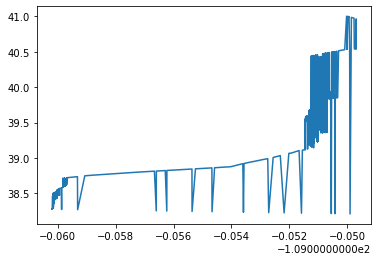

In [23]:
plt.plot(data_area_sorted[:1000].long,data_area_sorted[:1000].lat)

Untuk perhitungan area, kita akan bagi Wilayah Colorado menjadi dua bagian yaitu Northern dan Southern (dapat menggunakan acuan nilai tengah latitude dimana nilai maksimum ditambah nilai minimum lalu dibagi dua. Di atas nilai tengah northern dan di bawah nilai tengah southern) supaya mempermudah dalam menghitung Integral.

In [24]:
max_lat = data_area_sorted['lat'].max() #Menentukan nilai maksimum latitude Colorado
min_lat = data_area_sorted['lat'].min() #Menentukan nilai minimum latitude Colorado
mid_lat = (max_lat+min_lat)/2 #Menentukan nilai tengah latitude Colorado

Berikutnya kita akan buat menjadi dua dataframe untuk koordinat Southern Colorado dan Northern Colorado berdasarkan nilai tengah latitudenya

In [25]:
northern_area = data_area_sorted[data_area_sorted['lat'] >= mid_lat]
southern_area = data_area_sorted[data_area_sorted['lat'] < mid_lat]

Kita akan hitung luas area Colorado dengan cara mencari selisih northern area dan southern area, dimana area masing-masing dicari dengan menggunakan integral numerik aturan trapesium sebagai berikut:

In [27]:
area_N = integrate.trapz(northern_area['lat'],northern_area['long']) #Menghitung area dari latitude y=0 ke latitude pada northern area
area_S = integrate.trapz(southern_area['lat'],southern_area['long']) #Menghitung area dari latitude y=0 ke latitude pada southern area
total_area = area_N-area_S #total area Colorado
print(f'Area negara bagian Colorada diperkirakan sebesar {round(total_area)} derajat kuadrat.')

Area negara bagian Colorada diperkirakan sebesar 28 derajat kuadrat.


#### a. Integral jenis apa yang diterapkan pada kasus ini? (Tertentu/Tak tentu) dan mengapa demikian? berikan alasan!

Jenis integral yang saya terapkan disini adalah integral **tentu/definite**. Hasil yang didapat dari integral tentu berbentuk $\int_a^b \! f(x) \, \mathrm{d}x$ adalah luas yang dibatasi oleh kurva $f(x)$ dan sumbu $x$ dari $x=a$ (batas bawah) hingga $x=b$ (batas atas). Sedangkan apabila kita terapkan integral indefinite kita akan mendapatkan hasil berupa fungsi katakanlah $F(x)$,meskipun selisih fungsi $F(x)$ saat $x=a$ dan $x=b$ adalah luas, atau $\int_a^b \! f(x) \, \mathrm{d}x=F(b)-F(a).$

#### b. Untuk kasus ini, metode apa yang kamu pakai dalam perhitungan integral? secara simbolik atau numerik, dan mengapa?

Metode perhitungan integral yang digunakan dalam kasus ini adalah **integral numerik**. Karena nilai fungsi kita (latitude) hanya terdapat di beberapa titik saja, kita tidak mengetahui ekspresi atau formula fungsi tersebut terhadap longitude. Namun kita bisa tetap memprediksi luas permukaan tersebut dengan integral numerik, salah satunya adalah metode trapesium, dimana perkiraan luas adalah total luas trapesium-trapesium yang dibentuk berdasarkan titik-titik yang kita dapatkan dari data.

#### c. Library Scipy menyediakan banyak function/modul untuk menghitung integral. Function apa yang kamu gunakan dan berikan alasan yang logis!

Pada kasus ini function yang saya terapkan adalah **trapz**, dimana dengan menerapkan *integrate.trapz* pada data set kordinat $(x,y)$, kita dapat mencari total luas dari trapesium yang dibuat dari tiap dua titik data pada interval $x$, yaitu longitude. Dimana metode integral numerik aturan trapesium tersebut cukup dapat menghampiri/mengaproksimasi luas aktual, karena difference luas aktual dengan luas trapesium pada suatu interval lebih sedikit dibanding kita membuat suatu persegi panjang dari tiap dua titik tersebut sepanjang interval $x$.

Terdapat alternatif lain selain menggunakan aturan trapesium, yaitu dengan **Simpson's rules** yang bisa diterapkan pada library Scipy dengan *integrate.simps*. Mekanisme aturan Simpson's adalah dengan mencari area parabola pada tiap tiga titik sepanjang interval $x$.